<a href="https://colab.research.google.com/github/Pipo0603/ExerciseAI/blob/main/AI_Week4_BTVN7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=81f4675917b6b643269566ab1c495361fecf101c87f93bee9de9f315e91115ec
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


1808.1711659964542


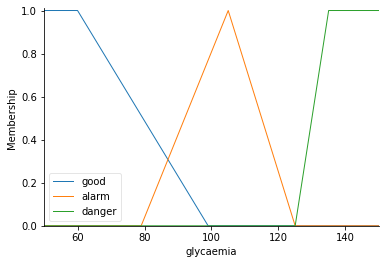

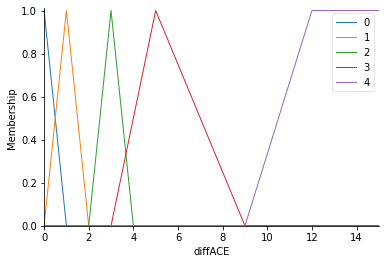

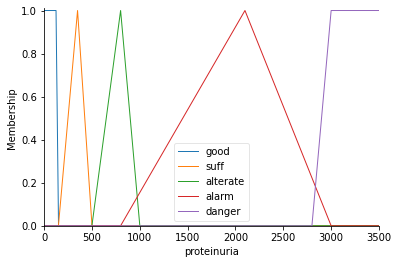

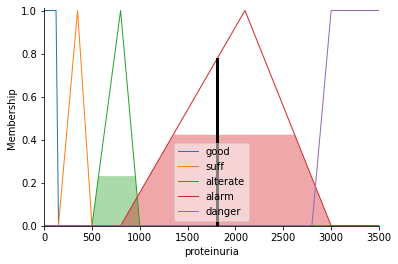

In [2]:
# BÀI TẬP 7
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

glycaemia   = ctrl.Antecedent(np.arange(50,151,1),'glycaemia')
diffACE     = ctrl.Antecedent(np.arange(0,16,1),'diffACE')
proteinuria = ctrl.Consequent(np.arange(0,3501,1),'proteinuria')

glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[50,50,60,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[79,105,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[125,135,150,150])

diffACE['0'] = fuzz.trimf(diffACE.universe,[0, 0, 1])
diffACE['1'] = fuzz.trimf(diffACE.universe,[0, 1, 2])
diffACE['2'] = fuzz.trimf(diffACE.universe,[2, 3, 3])
diffACE['3'] = fuzz.trimf(diffACE.universe,[3, 5, 9])
diffACE['4'] = fuzz.trapmf(diffACE.universe,[9, 12, 15, 15 ])


proteinuria['good'] = fuzz.trapmf(proteinuria.universe,[0, 0, 125, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[150, 350, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[500, 800, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[800, 2100, 3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[2800, 3000, 3500, 3500])


glycaemia.view()
diffACE.view()
proteinuria.view()

rule1 = ctrl.Rule(glycaemia['alarm'] & diffACE['2'] , proteinuria['suff'])
rule2 = ctrl.Rule(glycaemia['good'] & diffACE['1'] , proteinuria['suff'])
rule3 = ctrl.Rule(glycaemia['alarm'] & diffACE['1'] , proteinuria['alterate'])
rule4 = ctrl.Rule(glycaemia['danger'] & diffACE['1'] , proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & diffACE['3'] , proteinuria['alarm'])
rule6 = ctrl.Rule(glycaemia['good'] & diffACE['3'] , proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['danger'] & diffACE['4'] , proteinuria['danger'])
rule8 = ctrl.Rule(glycaemia['good'] & diffACE['0'] , proteinuria['good'])
gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
gfring = ctrl.ControlSystemSimulation(gfr_ctrl)
gfring.input['glycaemia'] = 90
gfring.input['diffACE'] = 4
gfring.compute()
print(gfring.output['proteinuria'])
proteinuria.view(sim = gfring)